# Modulación en Amplitud (AM) <br>
Sistemas de Comunicación - SCT54 <br>
Instituto Tecnológico Metropolitano - ITM <br>
<br>
Docente: Cristian Guarnizo


Paginas de interes: <br>
https://docs.scipy.org/doc/scipy/reference/io.html <br>
https://docs.scipy.org/doc/scipy/reference/signal.html <br>


In [0]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Datos 
fc = 200. # Frecuencia de la portadora
fm = 10.  # Frecuencia de la moduladora
Ec = 1.   # Amplitud de la portadora
Em = .4   # Amplitud de la moduladora

#Calculos
m = Em/Ec # Indice de modulacion
t = np.linspace(0.,.2,1000) # Vector de tiempos
vc = Ec*np.sin(2*np.pi*fc*t) # voltaje de la portadora

# Calculo de la amplitud modulada
vam = (1.0+m*np.sin(2*np.pi*fm*t))*vc

# Calculo de la envolvente
venp = (1+m*np.sin(2*np.pi*fm*t))*Ec
venn = -(1+m*np.sin(2*np.pi*fm*t))*Ec

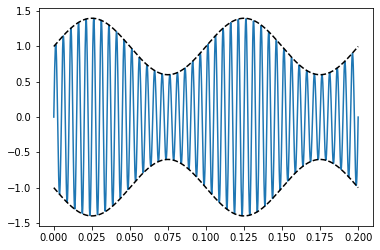

In [3]:
#Graficas de la modulacion y la envolvente
plt.plot(t,vam)
plt.plot(t,venp,'k--')
plt.plot(t,venn,'k--')

## Analisis de Fourier de una señal de audio

Primero descargamos el archivo de audio.

In [4]:
!wget -O senal.wav http://www.moviewavs.com/0053148414/WAVS/Movies/Simpsons_Movie/boring.wav
!ls

--2020-02-18 22:42:33--  http://www.moviewavs.com/0053148414/WAVS/Movies/Simpsons_Movie/boring.wav
Resolving www.moviewavs.com (www.moviewavs.com)... 62.75.137.72
Connecting to www.moviewavs.com (www.moviewavs.com)|62.75.137.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29850 (29K) [audio/x-wav]
Saving to: ‘senal.wav’

senal.wav           100%[===================>]  29.15K  --.-KB/s    in 0.1s    

2020-02-18 22:42:34 (238 KB/s) - ‘senal.wav’ saved [29850/29850]

sample_data  senal.wav	swvader03.wav


Importamos la librerias que nos ayudaran a cargar el archivo de audio a la memoria RAM. Finalmente cargamos el archivo, donde framerate es la frecuencia de muestreo de la señal y signal contiene las amplitudes de la señal en el tiempo.

In [5]:
from IPython.display import Audio
from scipy.io import wavfile

framerate, senal = wavfile.read('senal.wav')
print(framerate," Hz")

22050  Hz


Para reproducir el archivo de audio podemos usar el siguiente comando:

In [6]:
Audio(senal,rate=framerate)

Ahora, graficamos la señal de audio en el tiempo

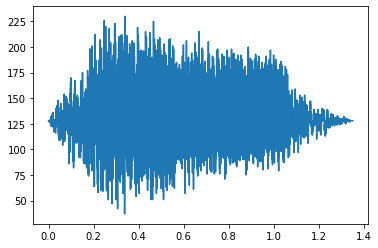

In [7]:
import matplotlib.pyplot as plt
t = np.arange(senal.size)*1.0/framerate #Calculamos el vector de tiempos
plt.plot(t,senal)

Como se puede observar la señal tiene una componente DC, la cual podemos eliminar restando la media de la señal.

In [0]:
senal = senal - np.mean(senal)

## Calculo del espectro Fourier de la señal de audio

Aqui se emplea la función FFT (Fast Fourier Transform - trasnformada Rápida de Fourier) que nos entrega las amplitudes de las frecuencias calculadas a partir de la señal de Audio.

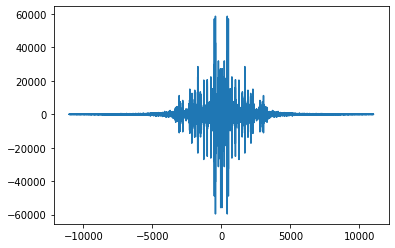

In [9]:
sp = np.fft.fft(senal)
freq = np.fft.fftfreq(senal.size,d=1.0/framerate)
plt.plot(freq, sp.real)

Para observar mejor el espectro, mejor graficamos solamente su parte positiva, ya que la negativa es simétrica. 

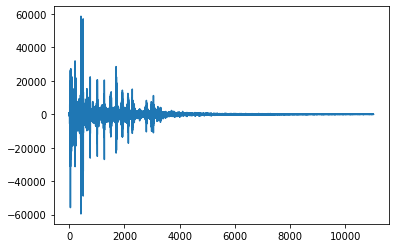

In [10]:
plt.plot(freq[freq>0], sp.real[freq>0])

Tambien podemos analizar el rango de frecuencias de 0 kHz - 4 kHz, usando el siguiente comando.

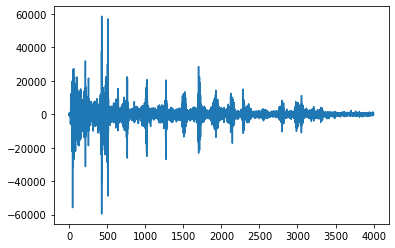

In [11]:
ind_freq = np.logical_and(freq>0,freq<4000)
plt.plot(freq[ind_freq], sp.real[ind_freq])

A partir de comandos de NumPy se puede determinar cual es la componente frecuencial con mayor amplitud, asi:

In [12]:
ind = np.argmax(sp.real[freq>0]) # Almacena el indice del máximo en "ind"
posfreq = freq[freq > 0] # Creamos un vector con las frecuencias positivas
print(posfreq[ind]," Hz")

428.33489901362145  Hz


## Cambiando la frencuencia de muestreo de la Señal de audio

Ahora cambiamos la frecuencia de muestreo por el doble. Para lograr esto, empleamos la función resample de la libreria Scipy.

In [0]:
from scipy.signal import resample

In [14]:
sen_rm = resample(senal,2*senal.size) # Señal remuestreada
framerate_rm = 2.0*framerate # Nueva frecuencia de muestreo
t_rm = np.arange(sen_rm.size)*1.0/(framerate_rm)
print("Numero de muestras señal original", senal.size)
print("Numero de muestras señal re-muestreada", sen_rm.size)

Numero de muestras señal original 29806
Numero de muestras señal re-muestreada 59612


Observe que al remuestrear una señal cambia su tamaño de acuerdo a la nueva frecuencia muestreo. La señal debe seguir siendo la misma en el tiempo, como se muestra a continuación.

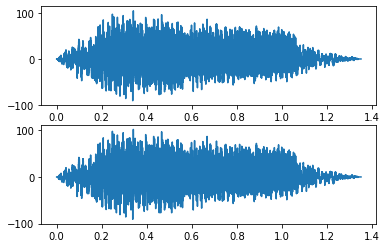

In [15]:
plt.subplot(2,1,1)
plt.plot(t_rm,sen_rm)
plt.subplot(2,1,2)
plt.plot(t,senal)

Al remuestrear una señal, cambia la frecuencia base del espectro que se obtiene con la FFT.

Text(0.5, 0, 'Espectro señal original')

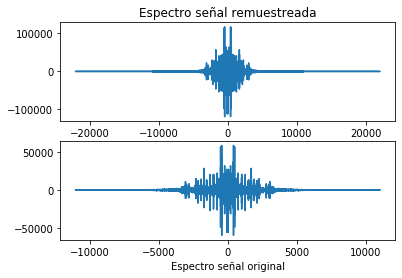

In [16]:
sp_rm = np.fft.fft(sen_rm)
freq_rm = np.fft.fftfreq(sen_rm.size,d=1.0/framerate_rm)

plt.subplot(2,1,1)
plt.plot(freq_rm, sp_rm.real)
plt.title("Espectro señal remuestreada")
plt.subplot(2,1,2)
plt.plot(freq, sp.real)
plt.xlabel("Espectro señal original")

## Modulacion en Amplitud (AM) de Señal de audio

Ahora tomamos la señal remuestreada y la modulamos en amplitud con una portadora de frecuencia 6kHz.


In [23]:
m = 0.95
Em = np.max(np.abs(sen_rm)) # Amplitud maxima de la moduladora
fc = 6000.0 # Frecuencia de la portadora en Hz
Ec = Em/m   # Amplitud de la portadora

vc = np.sin(2*np.pi*fc*t_rm) # Señal de la portadora

vam = Ec*vc + sen_rm*vc
print("Amplitud portadora: ", Ec)
print("Amplitud max moduladora: ", Em)
print("Indice de modulacion: ", m)

Amplitud portadora:  111.03244297076893
Amplitud max moduladora:  105.48082082223047
Indice de modulacion:  0.95


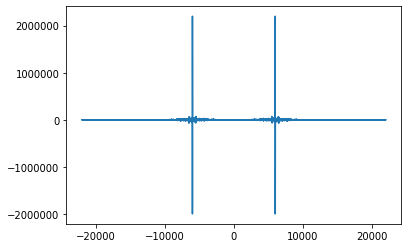

In [24]:
sp_am = np.fft.fft(vam)
plt.plot(freq_rm, sp_am.real)

Graficamos solamente la parte postivia del espectron, desde 2kHz hasta 10kHz

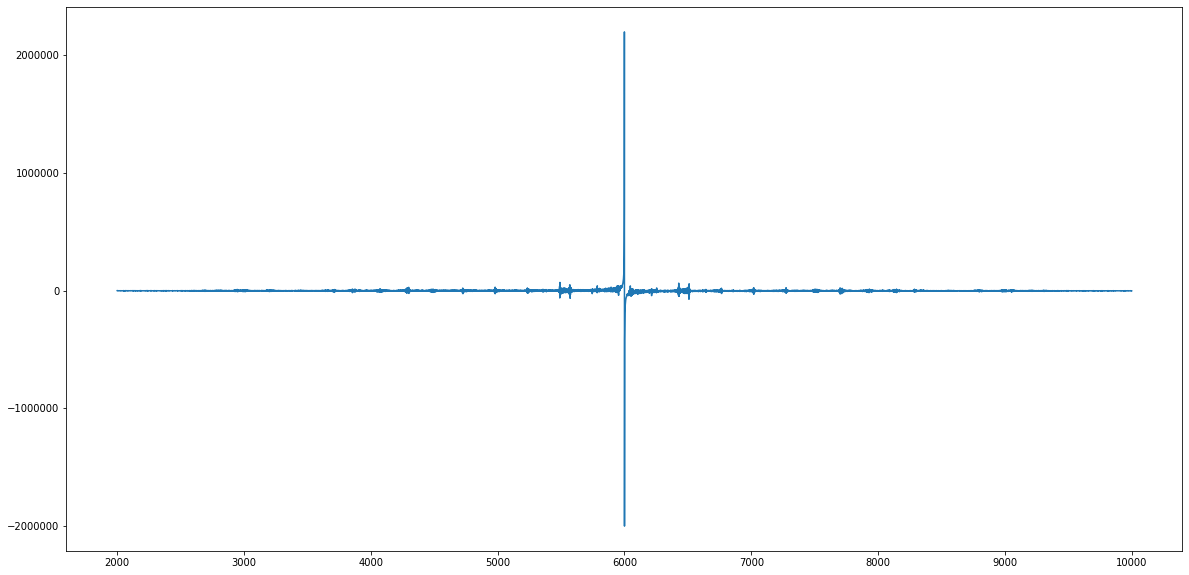

In [25]:
ind_pos = np.logical_and(freq_rm>2000,freq_rm<10000)
plt.figure(figsize=(20,10))
plt.plot(freq_rm[ind_pos], sp_am[ind_pos].real)

Eliminamos la componente de la portadora de manera artificial y graficamos el espectro de frecuencias entre 2kHz y 10kHz (6kHz-4kHz y 6kHz+10kHz).

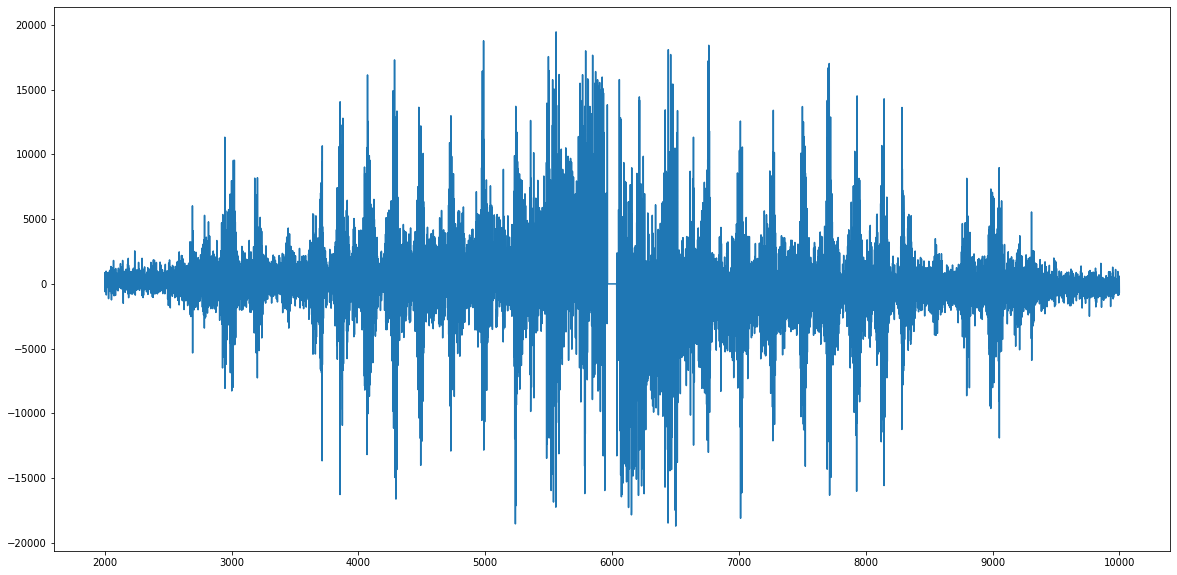

In [26]:
ind_pos = np.logical_and(freq_rm>2000,freq_rm<10000)
sp_am2 = sp_am.copy()
sp_am2[np.abs(sp_am2)>2e4] = 0.0
plt.figure(figsize=(20,10))
plt.plot(freq_rm[ind_pos], sp_am2[ind_pos].real)

Es interesante tambien observar la señal en el tiempo. Graficamos la señal modulada en el intervalo

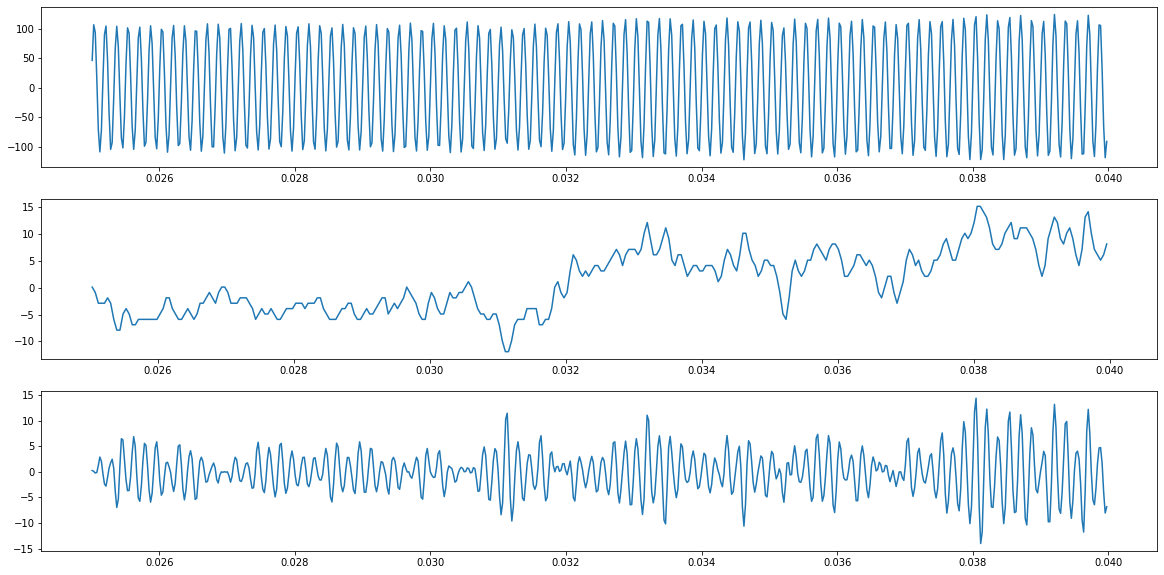

In [32]:
ind_t_rm = np.logical_and(t_rm>0.025,t_rm<0.04)
ind_t = np.logical_and(t>0.025,t<0.04)

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(t_rm[ind_t_rm], vam[ind_t_rm])
plt.subplot(3,1,2)
plt.plot(t[ind_t], senal[ind_t])
plt.subplot(3,1,3)
plt.plot(t_rm[ind_t_rm], vam[ind_t_rm] - Ec*vc[ind_t_rm])

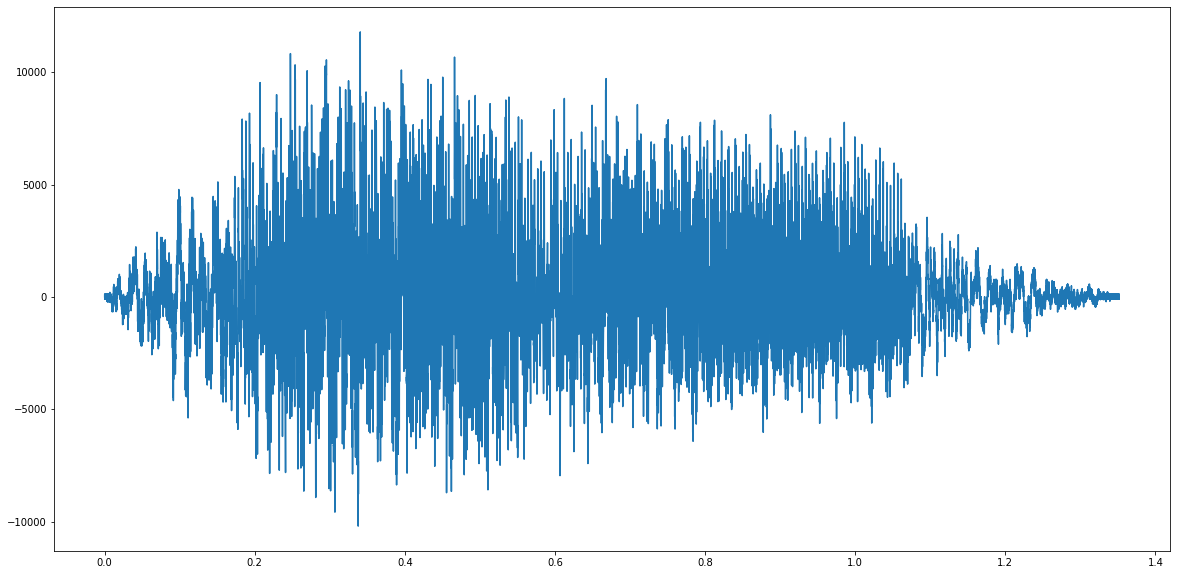

In [22]:
plt.figure(figsize=(20,10))
plt.plot(t_rm, vam)